# The initial K-means implementation

It should be noted that the csv file needs to be uploaded into the colab session. I have added the csv in the github repository. The original source of the dataset is https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data

In [65]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

# uploading the wanted csv file
import io
from google.colab import files
uploaded = files.upload()

Saving country-data.csv to country-data.csv


In [66]:
# the file name should be changed in case it does not match and throws an error
df = pd.read_csv(io.StringIO(uploaded['country-data.csv'].decode('utf-8')))

df = df[['country', 'total_fer', 'income']]
df.head()

,country,total_fer,income
0,Afghanistan,5.82,1610
1,Albania,1.65,9930
2,Algeria,2.89,12900
3,Angola,6.16,5900
4,Antigua and Barbuda,2.13,19100


GDPP:
The GDP per capita. Calculated as the Total GDP divided by the total population.

total_fer:
The number of children that would be born to each woman if the current age-fertility rates remain the same.

Text(0, 0.5, 'Fertility')

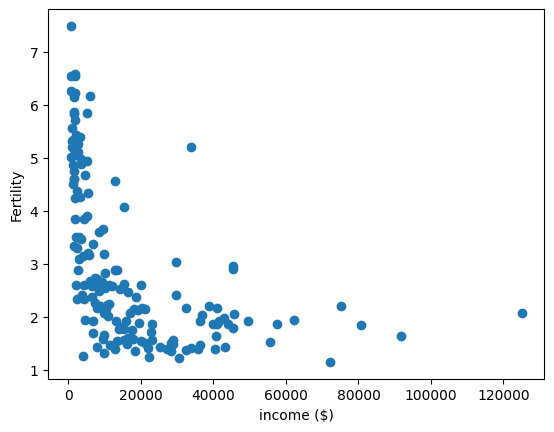

In [96]:
# Plain graph of the data and relationship between the features
plt.scatter(df.income, df.total_fer)
plt.xlabel('income ($)')
plt.ylabel('Fertility')


In [ ]:
# Checking for missing data
df.isnull().sum()

In [ ]:
# Applying a scaler to transform the data
scaler = MinMaxScaler()

scaler.fit(df[['income']])
df['income'] = scaler.transform(df[['income']])

scaler.fit(df[['total_fer']])
df['total_fer'] = scaler.transform(df[['total_fer']])
df.head()

In [80]:
# Applying the KMeans function
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['income','total_fer']])
y_predicted

array([0, 0, 0, 0, 2, 2, 0, 1, 1, 2, 2, 1, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       1, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 2, 0, 1, 2, 2, 0, 2, 0, 2, 0, 0, 1, 0, 0, 2, 2, 0,
       0, 2, 2, 1, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 0, 2, 2, 1, 2, 2, 0, 0, 1, 0, 0, 2,
       0, 1, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 1, 2, 1, 2, 0, 0, 2, 0, 0, 0], dtype=int32)

In [81]:
# creating clusters
df['cluster']=y_predicted
df.head()

,country,total_fer,income,cluster
0,Afghanistan,5.82,1610,0
1,Albania,1.65,9930,0
2,Algeria,2.89,12900,0
3,Angola,6.16,5900,0
4,Antigua and Barbuda,2.13,19100,2


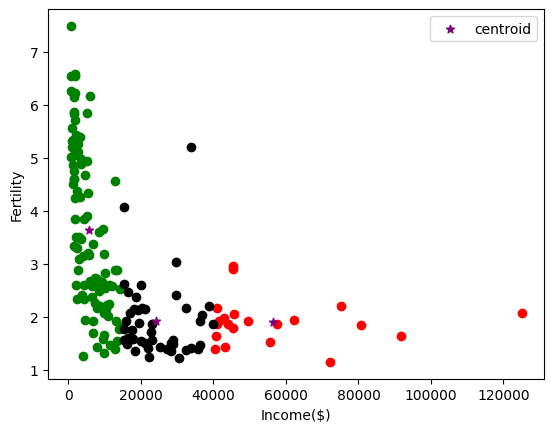

In [82]:
#plotting the clustered data
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.income,df1.total_fer,color='green')
plt.scatter(df2.income,df2.total_fer,color='red')
plt.scatter(df3.income,df3.total_fer,color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('Income($)')
plt.ylabel('Fertility')
plt.legend()

In [70]:
sse = []

k_rng = range(1,15)
for i in k_rng:
  km = KMeans(n_clusters=i)
  km.fit(df[['income','total_fer']])
  sse.append(km.inertia_)

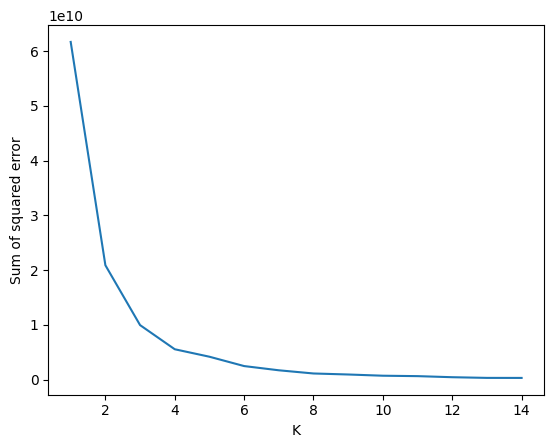

In [71]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

# Experimentation

This uses the same scaled dataframe as before but with different k-values

In [68]:
km = KMeans(n_clusters=8)
y_predicted = km.fit_predict(df[['income','total_fer']])
y_predicted

df['cluster']=y_predicted

Here 8 clusters are used, according to the previous elbow method this seems like good choice

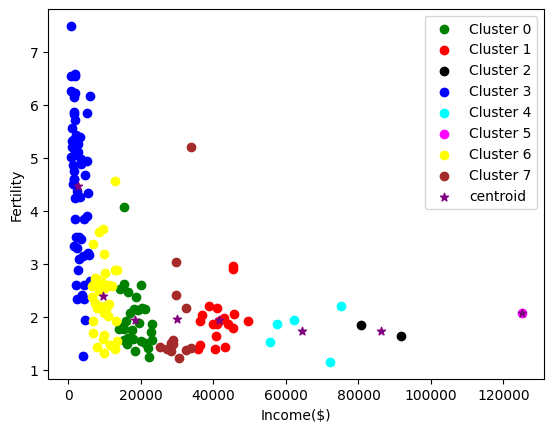

In [69]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]
df6 = df[df.cluster==5]
df7 = df[df.cluster==6]
df8 = df[df.cluster==7]

plt.scatter(df1.income,df1.total_fer,color='green', label='Cluster 0')
plt.scatter(df2.income,df2.total_fer,color='red', label='Cluster 1')
plt.scatter(df3.income,df3.total_fer,color='black', label='Cluster 2')
plt.scatter(df4.income,df4.total_fer,color='blue', label='Cluster 3')
plt.scatter(df5.income,df5.total_fer,color='cyan', label='Cluster 4')
plt.scatter(df6.income,df6.total_fer,color='magenta', label='Cluster 5')
plt.scatter(df7.income,df7.total_fer,color='yellow', label='Cluster 6')
plt.scatter(df8.income,df8.total_fer,color='brown', label='Cluster 7')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('Income($)')
plt.ylabel('Fertility')
plt.legend()

With 8 clusters the all of the outliers of the graph are captured well, this would assure that edge cases are taken care of. However i think that 8 is too many and things become unclear for human eyes. For the computer this might be the optimal amount of clusters depending on the use case

In [85]:
km = KMeans(n_clusters=6)
y_predicted = km.fit_predict(df[['income','total_fer']])
y_predicted

df['cluster']=y_predicted

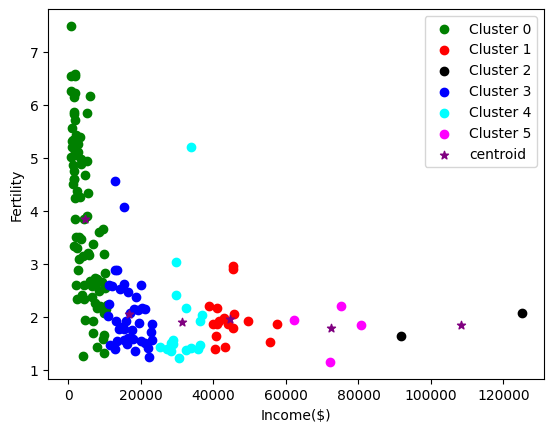

In [86]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]
df6 = df[df.cluster==5]

plt.scatter(df1.income,df1.total_fer,color='green', label='Cluster 0')
plt.scatter(df2.income,df2.total_fer,color='red', label='Cluster 1')
plt.scatter(df3.income,df3.total_fer,color='black', label='Cluster 2')
plt.scatter(df4.income,df4.total_fer,color='blue', label='Cluster 3')
plt.scatter(df5.income,df5.total_fer,color='cyan', label='Cluster 4')
plt.scatter(df6.income,df6.total_fer,color='magenta', label='Cluster 5')


plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('Income($)')
plt.ylabel('Fertility')
plt.legend()
plt.show()

6 clusters seems to be good, the extreme outliers are separated to their own cluster and rest of the clusters are clear.

## KMeans algorithm options: init='random'

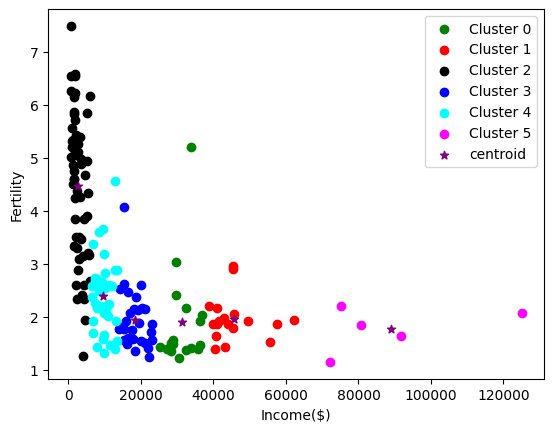

In [90]:
km = KMeans(n_clusters=6, init='random')
y_predicted = km.fit_predict(df[['income','total_fer']])
y_predicted

df['cluster']=y_predicted

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]
df6 = df[df.cluster==5]

plt.scatter(df1.income,df1.total_fer,color='green', label='Cluster 0')
plt.scatter(df2.income,df2.total_fer,color='red', label='Cluster 1')
plt.scatter(df3.income,df3.total_fer,color='black', label='Cluster 2')
plt.scatter(df4.income,df4.total_fer,color='blue', label='Cluster 3')
plt.scatter(df5.income,df5.total_fer,color='cyan', label='Cluster 4')
plt.scatter(df6.income,df6.total_fer,color='magenta', label='Cluster 5')


plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('Income($)')
plt.ylabel('Fertility')
plt.legend()
plt.show()

## Elkan algortihm

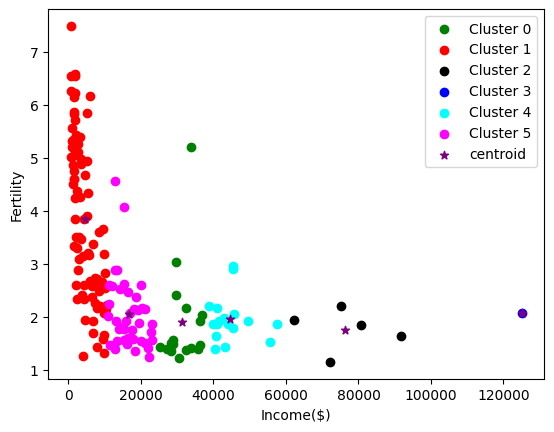

In [95]:
km = KMeans(n_clusters=6, algorithm='elkan')
y_predicted = km.fit_predict(df[['income','total_fer']])
y_predicted

df['cluster']=y_predicted

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]
df6 = df[df.cluster==5]

plt.scatter(df1.income,df1.total_fer,color='green', label='Cluster 0')
plt.scatter(df2.income,df2.total_fer,color='red', label='Cluster 1')
plt.scatter(df3.income,df3.total_fer,color='black', label='Cluster 2')
plt.scatter(df4.income,df4.total_fer,color='blue', label='Cluster 3')
plt.scatter(df5.income,df5.total_fer,color='cyan', label='Cluster 4')
plt.scatter(df6.income,df6.total_fer,color='magenta', label='Cluster 5')


plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('Income($)')
plt.ylabel('Fertility')
plt.legend()
plt.show()

## Max_iter=200

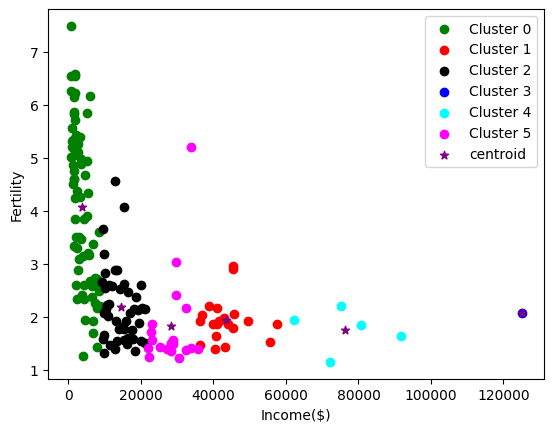

In [94]:
km = KMeans(n_clusters=6, max_iter=200)
y_predicted = km.fit_predict(df[['income','total_fer']])
y_predicted

df['cluster']=y_predicted

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]
df6 = df[df.cluster==5]

plt.scatter(df1.income,df1.total_fer,color='green', label='Cluster 0')
plt.scatter(df2.income,df2.total_fer,color='red', label='Cluster 1')
plt.scatter(df3.income,df3.total_fer,color='black', label='Cluster 2')
plt.scatter(df4.income,df4.total_fer,color='blue', label='Cluster 3')
plt.scatter(df5.income,df5.total_fer,color='cyan', label='Cluster 4')
plt.scatter(df6.income,df6.total_fer,color='magenta', label='Cluster 5')


plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('Income($)')
plt.ylabel('Fertility')
plt.legend()
plt.show()